# Research Question and Hypothesis

**Research Question:**  
How do anti-smoking policies and support programs influence the total smoking rates, as well as male and female smoking rates, in European countries in 2020 ?

**Hypothesis:**  
Men smoke more than women, even in European countries actively combating tobacco consumption.




In [1]:
# Import and Load Data
# Data manipulation
import pandas as pd
import numpy as np
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Statistical tests
from scipy.stats import ttest_ind
# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# File URLs
url_adults = "https://ourworldindata.org/grapher/share-of-adults-who-smoke.csv?v=1&csvType=full&useColumnShortNames=true"
url_men = "https://ourworldindata.org/grapher/share-of-men-who-are-smoking.csv?v=1&csvType=full&useColumnShortNames=true"
url_women = "https://ourworldindata.org/grapher/share-of-women-who-are-smoking.csv?v=1&csvType=full&useColumnShortNames=true"
url_advertising_bans = "https://ourworldindata.org/grapher/enforcement-of-bans-on-tobacco-advertising.csv?v=1&csvType=full&useColumnShortNames=true"
url_support_to_quit = "https://ourworldindata.org/grapher/support-to-help-to-quit-tobacco-use.csv?v=1&csvType=full&useColumnShortNames=true"

# Upload files
adults_df = pd.read_csv(url_adults, storage_options={'User-Agent': 'Mozilla/5.0'})
men_df = pd.read_csv(url_men, storage_options={'User-Agent': 'Mozilla/5.0'})
women_df = pd.read_csv(url_women, storage_options={'User-Agent': 'Mozilla/5.0'})
advertising_bans_df = pd.read_csv(url_advertising_bans, storage_options={'User-Agent': 'Mozilla/5.0'})
support_to_quit_df = pd.read_csv(url_support_to_quit, storage_options={'User-Agent': 'Mozilla/5.0'})

In [2]:
# List of European countries
european_countries = ['Albania', 'Andorra', 'Austria', 'Belgium', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria',
                      'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
                      'Hungary','Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova',
                      'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 
                      'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Russia']

In [3]:
# Rename columns for simplicity
adults_df = adults_df.rename(columns={'Entity': 'Country','sh_prv_smok': 'Smoker_Total_Adult'})
men_df = men_df.rename(columns={'Entity': 'Country','sh_prv_smok_ma': 'Smoker_Male_Adult'})
women_df = women_df.rename(columns={'Entity': 'Country','sh_prv_smok_fe': 'Smoker_Women_Adult'})
advertising_bans_df = advertising_bans_df.rename(columns={'Entity': 'Country','enforce_bans_on_tobacco_advertising': 'Advertising_Bans'})
support_to_quit_df = support_to_quit_df.rename(columns={'Entity': 'Country','offer_help_to_quit_tobacco_use': 'Support_To_Quit'})

# Filter for European countries and year 2020 only
adults_df = adults_df[(adults_df['Country'].isin(european_countries)) & (adults_df['Year'] == 2020)]
men_df = men_df[(men_df['Country'].isin(european_countries)) & (men_df['Year'] == 2020)]
women_df = women_df[(women_df['Country'].isin(european_countries)) & (women_df['Year'] == 2020)]
advertising_bans_df = advertising_bans_df[(advertising_bans_df['Country'].isin(european_countries)) & (advertising_bans_df['Year'] == 2020)]
support_to_quit_df = support_to_quit_df[(support_to_quit_df['Country'].isin(european_countries)) & (support_to_quit_df['Year'] == 2020)]

# Merge datasets on 'Country', 'Code' and 'Year'
merged_df = pd.merge(adults_df, men_df, on=['Country', 'Year', 'Code'], how='inner')
merged_df = pd.merge(merged_df, women_df, on=['Country', 'Year', 'Code'], how='inner')
merged_df = pd.merge(merged_df, advertising_bans_df, on=['Country', 'Year', 'Code'], how='inner')
merged_df = pd.merge(merged_df, support_to_quit_df, on=['Country', 'Year', 'Code'], how='inner')

# Keep only the necessary columns
merged_df = merged_df[['Country','Smoker_Total_Adult', 'Smoker_Male_Adult', 'Smoker_Women_Adult', 
                       'Advertising_Bans', 'Support_To_Quit']]

# Display the merged DataFrame
print("Merged DataFrame:")
print(merged_df)

Merged DataFrame:
                   Country  Smoker_Total_Adult  Smoker_Male_Adult  \
0                  Albania                22.4               38.8   
1                  Andorra                31.8               35.3   
2                  Austria                26.4               27.7   
3                  Belarus                30.5               47.4   
4                  Belgium                23.4               25.8   
5   Bosnia and Herzegovina                35.0               42.0   
6                 Bulgaria                39.0               40.9   
7                  Croatia                36.9               37.6   
8                   Cyprus                35.1               47.0   
9                  Czechia                30.7               35.0   
10                 Denmark                17.5               17.8   
11                 Estonia                29.7               36.3   
12                 Finland                21.6               26.9   
13              

In [4]:
# Statistics
# Country with the highest average percentage of smokers
country_highest_smoking = merged_df.groupby('Country')['Smoker_Total_Adult'].mean().idxmax()
highest_smoking_value = merged_df.groupby('Country')['Smoker_Total_Adult'].mean().max()

# Country with the lowest average percentage of smokers
country_lowest_smoking = merged_df.groupby('Country')['Smoker_Total_Adult'].mean().idxmin()
lowest_smoking_value = merged_df.groupby('Country')['Smoker_Total_Adult'].mean().min()

print(f"\nCountry with the highest average percentage of smokers: {country_highest_smoking} ({highest_smoking_value:.2f}%)")
print(f"Country with the lowest average percentage of smokers: {country_lowest_smoking} ({lowest_smoking_value:.2f}%)")


Country with the highest average percentage of smokers: Serbia (39.80%)
Country with the lowest average percentage of smokers: United Kingdom (15.40%)


In [5]:
# Average percentage of smokers (men vs women)
mean_smoking = merged_df[['Smoker_Male_Adult', 'Smoker_Women_Adult']].mean()

print("\nAverage percentage of smokers (men vs women):")
print(mean_smoking.round(2).apply(lambda x: f"{x}%").to_string(index=True))


Average percentage of smokers (men vs women):
Smoker_Male_Adult     32.97%
Smoker_Women_Adult    22.03%


In [6]:
# Men: Country with the highest average percentage of men smokers
country_highest_male_smoking = merged_df.groupby('Country')['Smoker_Male_Adult'].mean().idxmax()
highest_male_smoking_value = merged_df.groupby('Country')['Smoker_Male_Adult'].mean().max()

# Men: Country with the lowest average percentage of men smokers
country_lowest_male_smoking = merged_df.groupby('Country')['Smoker_Male_Adult'].mean().idxmin()
lowest_male_smoking_value = merged_df.groupby('Country')['Smoker_Male_Adult'].mean().min()

print(f"\nCountry with the highest average percentage of men smokers: {country_highest_male_smoking} ({highest_male_smoking_value:.2f}%)")
print(f"Country with the lowest average percentage of men smokers: {country_lowest_male_smoking} ({lowest_male_smoking_value:.2f}%)")


Country with the highest average percentage of men smokers: Moldova (51.70%)
Country with the lowest average percentage of men smokers: Norway (17.00%)


In [7]:
# Women: Country with the highest average percentage of women smokers
country_highest_female_smoking = merged_df.groupby('Country')['Smoker_Women_Adult'].mean().idxmax()
highest_female_smoking_value = merged_df.groupby('Country')['Smoker_Women_Adult'].mean().max()

# Women: Country with the lowest average percentage of women smokers
country_lowest_female_smoking = merged_df.groupby('Country')['Smoker_Women_Adult'].mean().idxmin()
lowest_female_smoking_value = merged_df.groupby('Country')['Smoker_Women_Adult'].mean().min()

print(f"\nCountry with the highest average percentage of women smokers: {country_highest_female_smoking} ({highest_female_smoking_value:.2f}%)")
print(f"Country with the lowest average percentage of women smokers: {country_lowest_female_smoking} ({lowest_female_smoking_value:.2f}%)")


Country with the highest average percentage of women smokers: Serbia (39.10%)
Country with the lowest average percentage of women smokers: Albania (6.00%)


## Statistical Analysis
The average percentage of smokers shows that men represent **32.97%** on average across European countries, while women represent **22.03%**, which is significantly lower compared to men smokers.

Regarding total smokers, **Serbia** has the highest average percentage at **39.80%**, while **United Kingdom** records the lowest percentage at **15.40%**. Among men smokers, **Moldova** leads with the highest percentage at **51.70%**, showing a significant prevalence of smoking among men, whereas **Norway** has the lowest percentage at **17.00%**. For women smokers, **Serbia** records the highest percentage at **39.10%**, whereas **Albania** has the lowest percentage at **6.00%**.


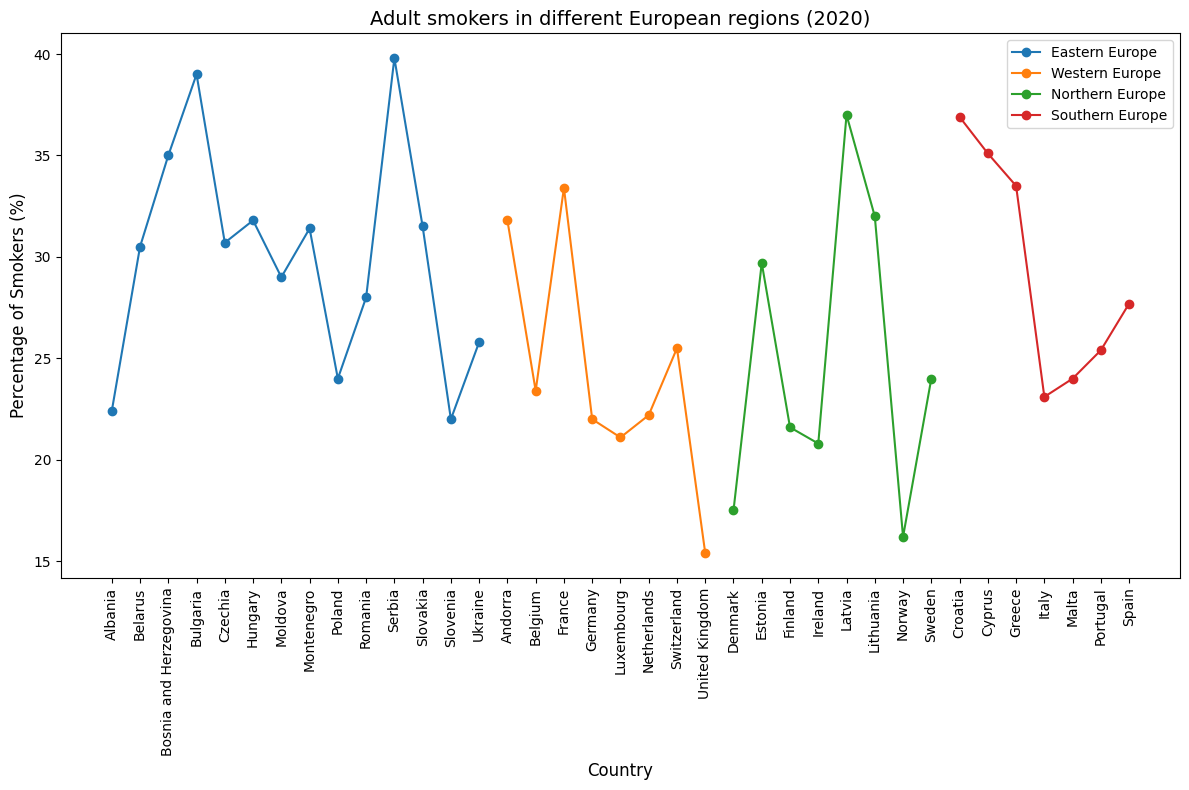

In [8]:
#Visualisation
# Adult smokers in different European regions
eastern_europe = ['Poland', 'Hungary', 'Czechia', 'Romania', 'Bulgaria', 'Belarus', 'Moldova', 'Ukraine', 'Slovakia', 'Serbia',
                  'Slovenia', 'Bosnia and Herzegovina', 'Montenegro', 'Albania']
western_europe = ['France', 'Germany', 'Netherlands', 'Belgium', 'United Kingdom', 'Luxembourg', 'Switzerland', 'Andorra']
northern_europe = ['Norway', 'Sweden', 'Denmark', 'Finland', 'Iceland', 'Estonia', 'Latvia', 'Lithuania', 'Ireland']
southern_europe = ['Italy', 'Spain', 'Portugal', 'Greece', 'Malta', 'Cyprus', 'Croatia']

regions = {"Eastern Europe": eastern_europe,
           "Western Europe": western_europe,
           "Northern Europe": northern_europe,
           "Southern Europe": southern_europe}

plt.figure(figsize=(12, 8))
for region, countries in regions.items():
    region_df = merged_df[merged_df['Country'].isin(countries)]
    plt.plot(region_df['Country'], region_df['Smoker_Total_Adult'], label=region, marker='o')

plt.title("Adult smokers in different European regions (2020)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Percentage of Smokers (%)", fontsize=12)
plt.xticks(rotation=90)  
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

## Visualization Analysis


The distribution of adult smokers varies significantly across different European regions in 2020. In **Eastern Europe**, the percentage of smokers is generally higher, with countries like Serbia and Bulgaria exceeding **35%**, highlighting a region with consistently high smoking rates. Conversely, **Western Europe** shows much lower smoking percentages, with countries such as United Kingdom, Belgium, Germany, Luxembourg and Netherland having rates below **25%**, reflecting stricter policies and cultural norms against smoking.

In **Northem Europe**, the percentages are more moderate, with most countries averaging between **16%** and **30%**. For instance, Norway and Estonia exhibit rates around this range, suggesting a balance between policies and smoking culture. Finally, **Southern Europe** demonstrates varying percentages, with countries like Croatia, Greece and Cyprus recording higher rates, while Portugal and Spain remain relatively lower in comparison.


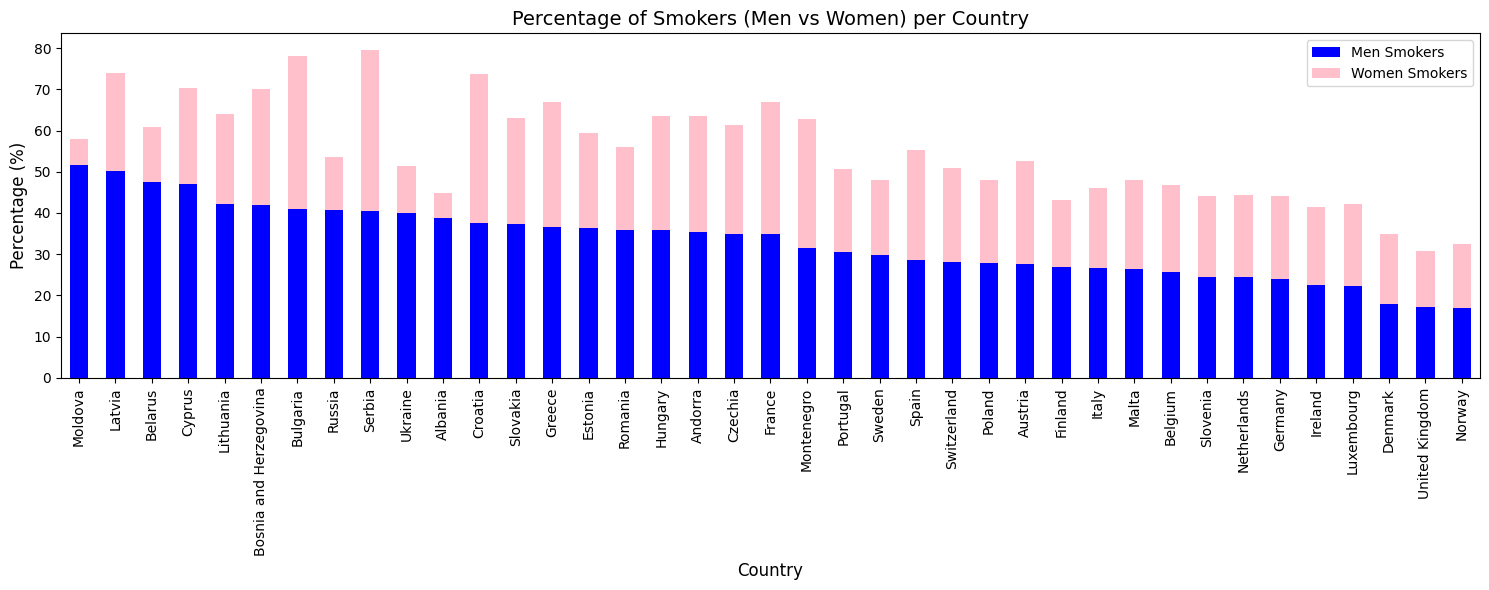

In [9]:
# Percentage of Smokers (Men vs Women) per Country
smoking_gender = merged_df.groupby('Country')[['Smoker_Male_Adult', 'Smoker_Women_Adult']].mean().sort_values(by='Smoker_Male_Adult', ascending=False)

smoking_gender.plot(kind='bar', stacked=True, figsize=(15, 6), color=['blue', 'pink'])
plt.title('Percentage of Smokers (Men vs Women) per Country', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.legend(['Men Smokers', 'Women Smokers'], fontsize=10)
plt.tight_layout()
plt.show()

## Visualization Analysis

- **Moldova** has the highest percentage of men smokers.  
- **Serbia** has the highest percentage of women smokers.  
- In most countries, the percentage of men smokers is consistently higher than that of women smokers,  
  with the gap being particularly pronounced in countries such as **Albania** and **Moldova**.  
- **Denmark**, **Norway**, and the **United Kingdom** have the lowest percentages of smokers overall,  
  reflecting effective public health policies and cultural norms that discourage smoking.  


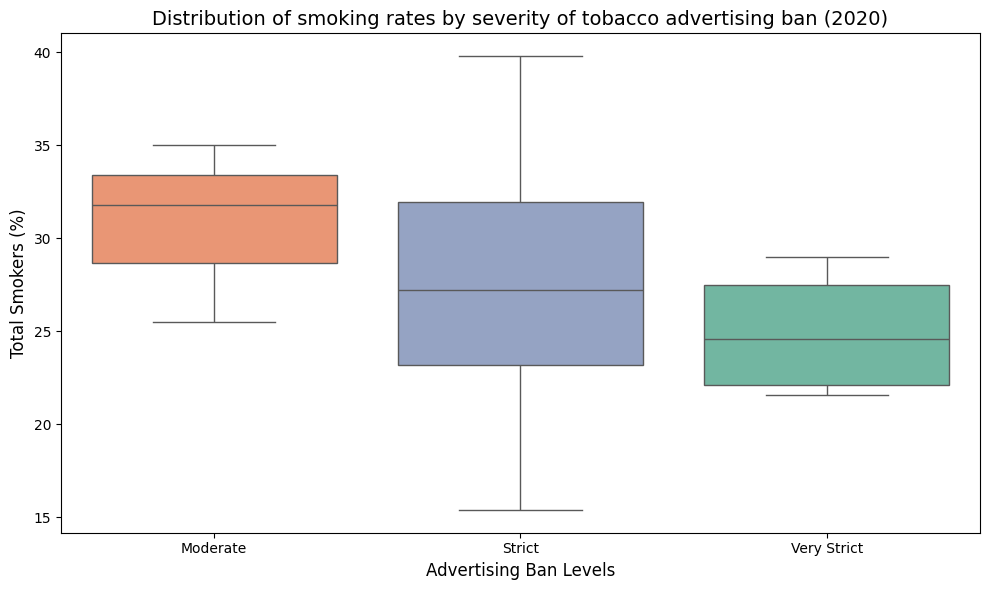

In [10]:
# Distribution of smoking rates by severity of tobacco advertising ban

# Map numbers to clear labels and sort them in the correct order
ban_labels = {2: 'Moderate', 4: 'Strict', 5: 'Very Strict'}
merged_df['Advertising_Bans_Label'] = merged_df['Advertising_Bans'].map(ban_labels)

# Ensure the x-axis is ordered
ordered_labels = ['Moderate', 'Strict', 'Very Strict']
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=merged_df,
    x='Advertising_Bans_Label',
    y='Smoker_Total_Adult',
    hue='Advertising_Bans_Label',
    order=ordered_labels,
    palette='Set2',
    dodge=False 
)

plt.title('Distribution of smoking rates by severity of tobacco advertising ban (2020)', fontsize=14)
plt.xlabel('Advertising Ban Levels', fontsize=12)
plt.ylabel('Total Smokers (%)', fontsize=12)
plt.legend([], [], frameon=False)  
plt.tight_layout()
plt.show()

## Visualization Analysis

This boxplot illustrates the distribution of smoking rates across European countries in 2020, segmented by the severity of tobacco advertising bans.

Countries with **Moderate** advertising bans show a relatively narrow range of smoking rates, with most values clustering between 27% and 33%. This suggests that moderate restrictions have a limited impact on reducing smoking rates.

In contrast, countries with **Strict** advertising bans exhibit a wider range of smoking rates. This variability highlights that the effectiveness of strict policies may depend on additional factors, such as enforcement or cultural attitudes toward smoking.

Finally, countries with **Very Strict** advertising bans have the lowest overall smoking rates. The significant reduction in the median compared to the other categories suggests that the strictest restrictions may have a strong correlation with lower smoking prevalence. These results emphasize the potential impact of comprehensive advertising bans on reducing smoking rates across countries.

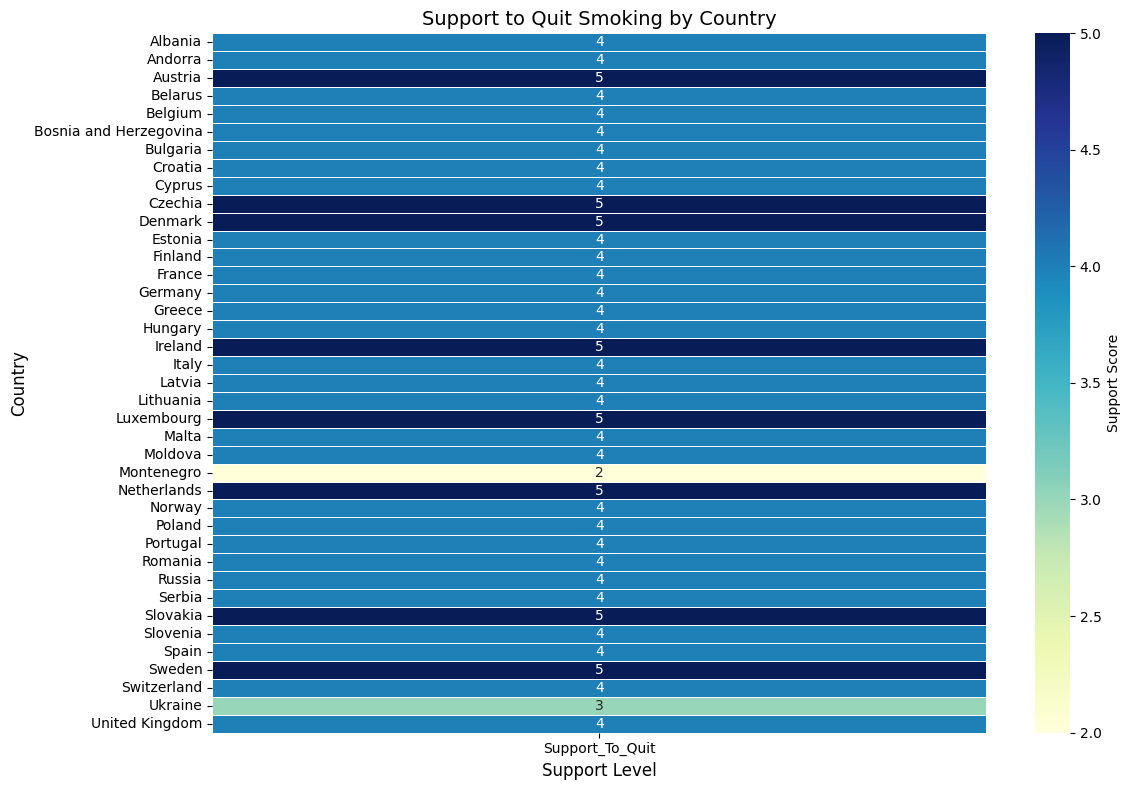

In [11]:
# Support to Quit Smoking by Country
support_to_quit_avg = merged_df.groupby('Country')['Support_To_Quit'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.heatmap(
    support_to_quit_avg.pivot_table(values='Support_To_Quit', index='Country', aggfunc='mean'),
    annot=True, cmap='YlGnBu', cbar_kws={'label': 'Support Score'}, linewidths=0.5
)
plt.title("Support to Quit Smoking by Country", fontsize=14)
plt.ylabel("Country", fontsize=12)
plt.xlabel("Support Level", fontsize=12)
plt.tight_layout()
plt.show()

## Visualization Analysis

The heatmap showcases the levels of support provided to quit smoking across various European countries in 2020. Countries are rated on a scale from 2 to 5, with higher scores reflecting more robust support programs to aid individuals in quitting smoking. Countries like **Austria**, **Czechia**, **Denmark**, **Ireland**, **Luxembourg**, **Sweden**, **Slovakia**, and **Netherlands** achieve the maximum score of 5, indicating comprehensive support measures. 

Conversely, **Montenegro** stands out with the lowest score of 2, highlighting a significant gap in smoking cessation support compared to its European counterparts. Country as **Ukraine** also shows relatively lower support levels with scores of 3. 

This visualization underscores the disparity in the commitment to smoking cessation programs among European countries, emphasizing the need for enhanced strategies in nations with lower scores.


In [12]:
# Hypothesis Testing
# Separate data into male and female smokers
men_smokers = merged_df['Smoker_Male_Adult']
women_smokers = merged_df['Smoker_Women_Adult']

# Perform t-test
t_stat, p_value = ttest_ind(men_smokers, women_smokers, equal_var=False)

# Print results and interpretation
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.10f}")
if p_value < 0.05:
    print("There is a significant difference in smoking rates between men and women.")
else:
    print("There is no significant difference in smoking rates between men and women.")

T-Statistic: 5.84
P-Value: 0.0000001305
There is a significant difference in smoking rates between men and women.


## Hypothesis Testing Analysis

A two-sample t-test was performed to compare smoking rates between men and women in European countries in 2020. The t-statistic obtained was **5.84**, and the p-value was **0.0000001305**, which is significantly less than the conventional threshold of 0.05.

This result indicates that there is a statistically significant difference in smoking rates between men and women. Specifically, men tend to smoke more than women across European countries, as previously observed in the summary statistics. The low p-value suggests that the observed difference is unlikely to have occurred due to random chance, providing strong evidence to support the hypothesis that gender significantly influences smoking behavior.


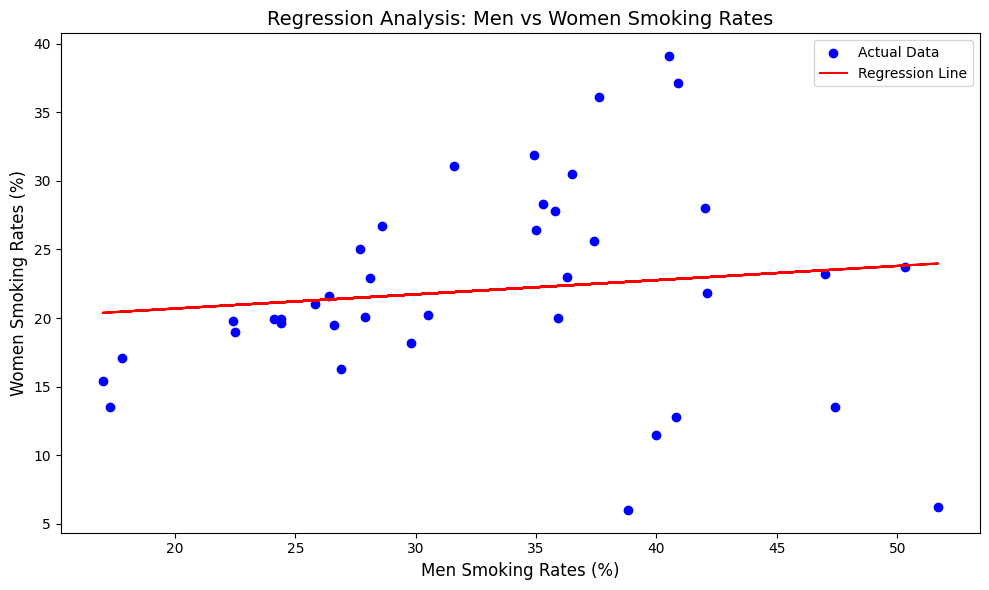

Regression Coefficient: 0.10
For every 1% increase in men smoking rates, women smoking rates change by approximately 0.10%.


In [13]:
# Regression Analysis
# Prepare data
X = merged_df[['Smoker_Male_Adult']]
y = merged_df['Smoker_Women_Adult']

# Fit linear regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Regression Analysis: Men vs Women Smoking Rates', fontsize=14)
plt.xlabel('Men Smoking Rates (%)', fontsize=12)
plt.ylabel('Women Smoking Rates (%)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Print interpretation
print(f"Regression Coefficient: {model.coef_[0]:.2f}")
print(f"For every 1% increase in men smoking rates, women smoking rates change by approximately {model.coef_[0]:.2f}%.")

## Regression Analysis

This scatter plot and regression line explore the relationship between men and women smoking rates across European countries in 2020. The regression coefficient of **0.10** indicates a positive but weak correlation between the two variables. Specifically, for every 1% increase in men smoking rates, women smoking rates are expected to increase by approximately **0.10%**.

The distribution of points suggests significant variability among countries. While some countries show closely aligned smoking rates between genders, others, such as **Moldova** and **Norway**, exhibit wider disparities. The weak slope of the regression line indicates that smoking behaviors among men and women are influenced by additional factors beyond the gender-specific smoking trends. 

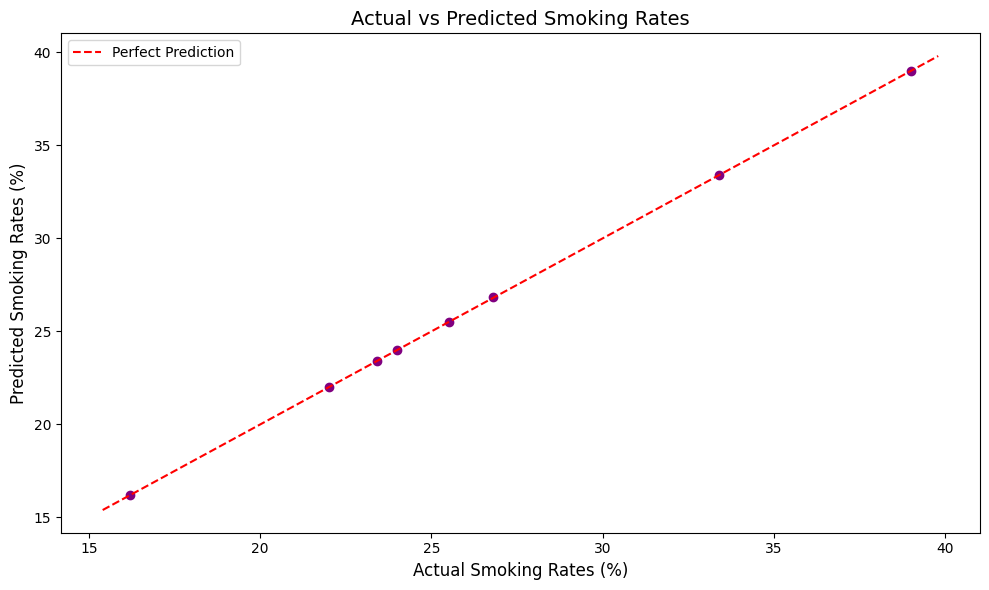

Mean Squared Error: 0.00060
A lower MSE indicates the model is better at predicting total smoking rates from male and female data.


In [14]:
# Machine Learning (Simple Linear Regression for Total Smokers Prediction)
# Prepare data
X = merged_df[['Smoker_Male_Adult', 'Smoker_Women_Adult']]
y = merged_df['Smoker_Total_Adult']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.title('Actual vs Predicted Smoking Rates', fontsize=14)
plt.xlabel('Actual Smoking Rates (%)', fontsize=12)
plt.ylabel('Predicted Smoking Rates (%)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Print interpretation
print(f"Mean Squared Error: {mse:.5f}")
print("A lower MSE indicates the model is better at predicting total smoking rates from male and female data.")

## Actual vs Predicted Smoking Rates
This scatter plot compares the actual smoking rates to the predicted smoking rates, with a red dashed line representing perfect prediction. The model exhibits a **Mean Squared Error (MSE)** of **0.00060**, indicating a high degree of accuracy in the predictions.

The close alignment of most data points to the red dashed line suggests that the model is effective at predicting total smoking rates based on male and female data. A lower MSE value confirms the model's ability to minimize prediction errors, demonstrating its reliability in capturing the relationship between the actual and predicted smoking rates.

## Conclusion
The analysis confirms the hypothesis that **men smoke more than women, even in European countries actively combating tobacco consumption.** The results of the **t-test** show a statistically significant difference between male and female smoking rates, with a **t-statistic** of **5.84** and an extremely low p-value of 0.0000001305, far below the 0.05 threshold. This indicates that the likelihood of this difference being due to random chance is practically zero. Men have an average smoking rate of **32.97%**, compared to **22.03% for women**, highlighting a significant gender disparity.

Furthermore, the regression analysis reinforces this conclusion by revealing a positive but weak relationship between male and female smoking rates. The **regression coefficient of 0.10** indicates that a 1% increase in male smoking rates corresponds to only a 0.10% increase in female smoking rates. This weak correlation suggests that, while male and female smoking behaviors are somewhat related, external factors such as cultural norms and policy effectiveness also play a significant role.

Regarding anti-smoking policies, countries with **very strict advertising bans** demonstrate overall lower smoking rates, particularly among men, showing a significant reduction in smoking prevalence. Additionally, countries with **robust support programs to help quit smoking**, such as Ireland and Luxembourg, report lower smoking rates, emphasizing the importance of support measures in combating tobacco consumption.

In summary, this analysis highlights a marked gender disparity in smoking rates across Europe, even in countries with strict anti-smoking policies. The findings demonstrate that targeted strategies, combining strict advertising bans with increased support to quit smoking, can effectively reduce overall smoking rates while addressing gender disparities.
